In [1]:
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

# #1

In [2]:
(x_train,y_train),(x_test,y_test) =keras.datasets.cifar10.load_data()
x_train, x_test = x_train.astype('float32')/255, x_test.astype('float32')/255

# #2

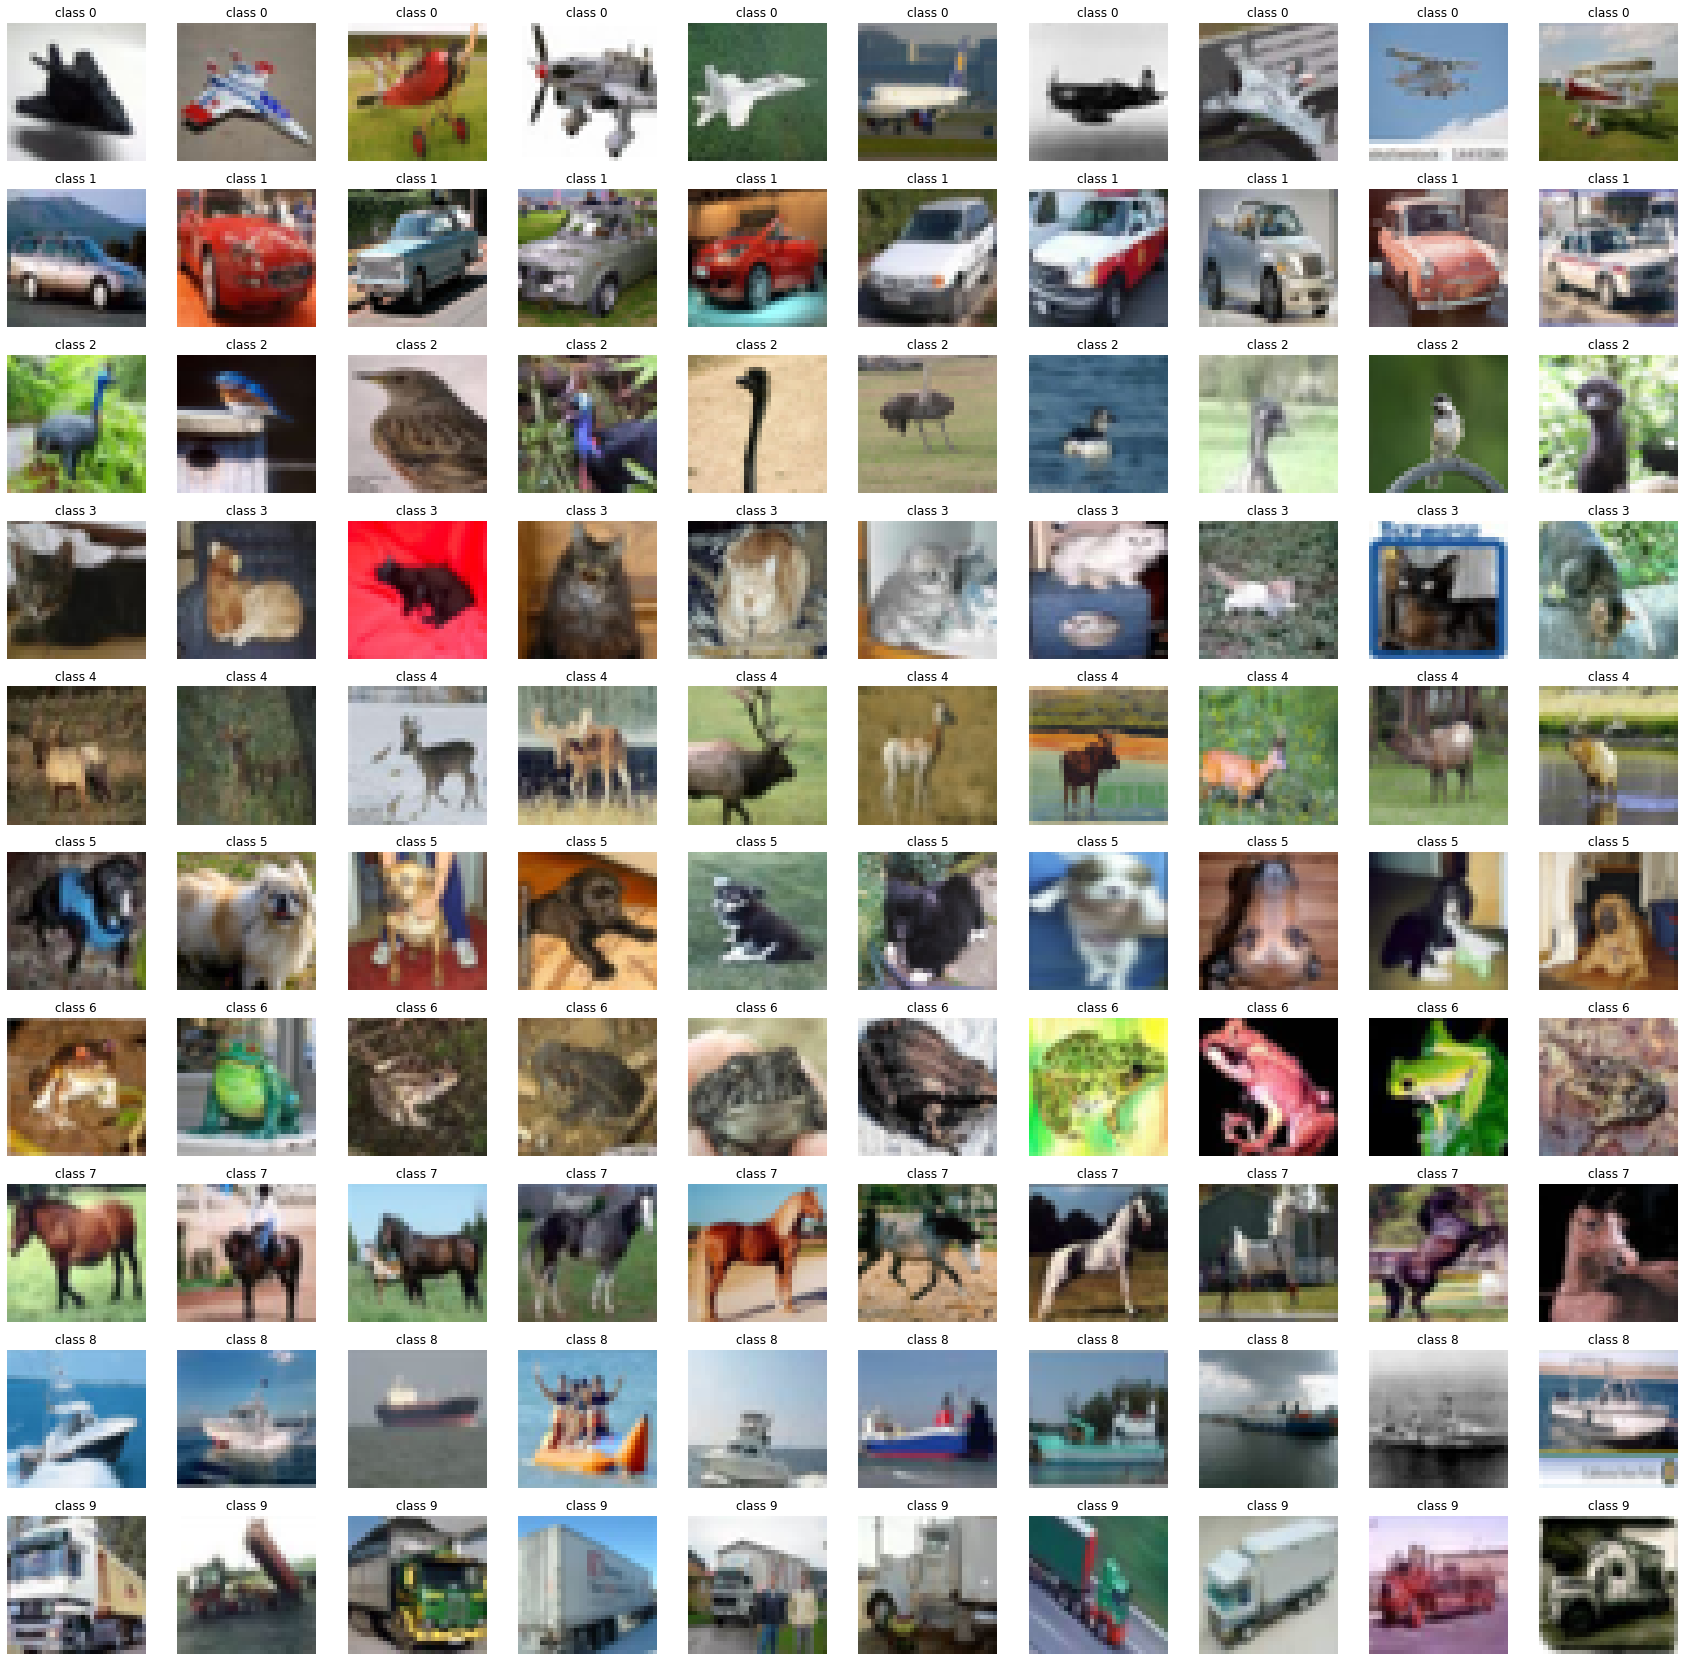

In [3]:
from matplotlib import pyplot as plt

labels = np.unique(y_train)
fig, ax = plt.subplots(len(labels), 10, figsize = (30, 30))
for i, label in enumerate(labels):
    for j in range(10):
        ax[i][j].imshow(x_train[y_train.ravel() == label][j])
        ax[i][j].set_title(f"class {label}")
        ax[i][j].axis(False)


# #3

In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')

In [5]:
y_test = keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')

In [6]:
def build_vgg_block(input_layer, filter, three_layered_block = False):
  x = layers.Conv2D(filter, (3, 3), padding = 'same', activation = "relu")(input_layer)
  x = layers.Conv2D(filter, (3, 3), padding = 'same', activation = 'relu')(x)

  if three_layered_block:
    x = layers.Conv2D(filter, (3, 3), padding = 'same', activation = 'relu')(x)
  x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
  return x


input_layer = keras.Input((32, 32, 3))
x = build_vgg_block(input_layer, 64)
x = build_vgg_block(x, 128)
x = build_vgg_block(x, 256, True)
x = build_vgg_block(x, 512, True)
x = build_vgg_block(x, 512, True)
x = layers.Flatten()(x)
x = layers.Dense(256, activation = 'relu')(x)
x = layers.Dense(256, activation = 'relu')(x)
output_layer = layers.Dense(10, activation = "softmax")(x)

model = keras.Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

2024-01-08 23:12:31.036612: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-01-08 23:12:31.036660: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-01-08 23:12:31.036670: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-01-08 23:12:31.036750: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-08 23:12:31.036784: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model_name = "./vgg16.h5"
mcp_save = ModelCheckpoint(filepath=model_name,
                           save_best_only=True,
                           save_weights_only=True,
                           monitor='val_loss',
                           mode='min',
                           verbose=1)

# #4

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                             

# #5

## 1

In [9]:
model.fit(x_train, y_train, validation_split = .2, batch_size = 64, epochs = 50, shuffle = True)

Epoch 1/50


2024-01-08 23:12:35.447707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 133s 210ms/step - loss: 2.3026 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.0952
Epoch 2/50
625/625 [==============================] - 130s 207ms/step - loss: 2.3024 - accuracy: 0.1018 - val_loss: 2.3023 - val_accuracy: 0.1132
Epoch 3/50
625/625 [==============================] - 124s 198ms/step - loss: 2.3021 - accuracy: 0.1079 - val_loss: 2.3018 - val_accuracy: 0.0990
Epoch 4/50
 50/625 [=>............................] - ETA: 2:09 - loss: 2.3015 - accuracy: 0.1119

KeyboardInterrupt: 

In [ ]:
# model.save(model_name)
model.load_weights(model_name)
# model = keras.models.load_model(model_name)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
predicted = model.predict(x_test)
y_predicted = np.argmax(predicted, axis=1)

313/313 [==============================] - 2s 7ms/step


In [ ]:
confusion_matrix(np.argmax(y_test, axis = 1), y_predicted)

array([[794,  15,  49,  23,  19,   8,   2,   9,  51,  30],
       [ 20, 843,   9,   5,   1,   5,   9,   2,  23,  83],
       [ 44,   4, 665,  36, 101,  69,  40,  31,   4,   6],
       [ 22,   9,  70, 491,  65, 195,  61,  51,  12,  24],
       [ 14,   3,  58,  45, 717,  49,  33,  78,   2,   1],
       [  8,   7,  37, 137,  40, 689,  21,  53,   1,   7],
       [  3,  11,  55,  57,  52,  30, 759,   7,   8,  18],
       [ 16,   2,  28,  37,  37,  58,   3, 806,   1,  12],
       [ 74,  21,  17,  20,   4,   2,   7,   1, 828,  26],
       [ 27,  63,   7,  19,   1,   6,   5,   9,  13, 850]])

## 2

In [15]:
vgg = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(32, 32, 3),
    classes = 10,
    classifier_activation = "softmax",)


x = layers.Flatten()(vgg.output)
x = layers.Dense(256, activation = 'relu')(x)
x = layers.Dense(256, activation = 'relu')(x)
output_layer = layers.Dense(10, activation = "softmax")(x)

model2 = keras.Model(inputs = vgg.input, outputs=output_layer)


A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d6bbae143d832006294945121d1f1fc so we will re-download the data.
58889256/58889256 [==============================] - 21s 0us/step


In [ ]:
model2.summary()

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

In [ ]:
model_name = "./vgg16_2.h5"
mcp_save = ModelCheckpoint(filepath=model_name,
                           save_best_only=True,
                           save_weights_only=True,
                           monitor='val_loss',
                           mode='min',
                           verbose=1)

In [ ]:
history2 = model2.fit(x_train, y_train,epochs = 50 , shuffle = True ,validation_split = .2 , callbacks = mcp_save)

Epoch 1/50
1249/1250 [============================>.] - ETA: 0s - loss: 1.3785 - acc: 0.5058
Epoch 1: val_loss improved from inf to 0.77449, saving model to /content/drive/MyDrive/Colab Notebooks/vgg16/vggo16_2.h5
1250/1250 [==============================] - 47s 36ms/step - loss: 1.3779 - acc: 0.5060 - val_loss: 0.7745 - val_acc: 0.7369
Epoch 2/50
1249/1250 [============================>.] - ETA: 0s - loss: 0.6677 - acc: 0.7708
Epoch 2: val_loss improved from 0.77449 to 0.62737, saving model to /content/drive/MyDrive/Colab Notebooks/vgg16/vggo16_2.h5
1250/1250 [==============================] - 46s 37ms/step - loss: 0.6676 - acc: 0.7708 - val_loss: 0.6274 - val_acc: 0.7883
Epoch 3/50
1249/1250 [============================>.] - ETA: 0s - loss: 0.4943 - acc: 0.8320
Epoch 3: val_loss improved from 0.62737 to 0.49648, saving model to /content/drive/MyDrive/Colab Notebooks/vgg16/vggo16_2.h5
1250/1250 [==============================] - 44s 35ms/step - loss: 0.4942 - acc: 0.8320 - val_loss: 

In [ ]:
# model2.save(model_name)
model2.load_weights(model_name)
# model2 = keras.models.load_model(model_name)

In [ ]:
predicted = model2.predict(x_test)
y_predicted = np.argmax(predicted, axis=1)

In [ ]:

confusion_matrix(np.argmax(y_test, 1), y_predicted)

## 3

In [17]:
vgg = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(32, 32, 3),
    classes = 10,
    classifier_activation = "softmax",)
vgg.trainable(False)
x = layers.Flatten()(vgg.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
output_layer = layers.Dense(10, activation='softmax')(x)

model3 = keras.Model(inputs= vgg.input, outputs=output_layer)

In [18]:
model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
model3.compile(loss='categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

In [ ]:
model_name = "./vgg16_3.h5"
mcp_save = ModelCheckpoint(filepath=model_name,
                           save_best_only=True,
                           save_weights_only=True,
                           monitor='val_loss',
                           mode='min',
                           verbose=1)

In [ ]:
history3 = model3.fit(x_train, y_train, epochs = 50 , shuffle = True , validation_split = .2 , callbacks = mcp_save)

In [ ]:
# model3.save(model_name)
model3.load_weights(model_name)
# model3 = keras.models.load_model(model_name)

In [ ]:
predicted = model3.predict(x_test)
y_predicted = np.argmax(predicted, axis=1)
confusion_matrix(np.argmax(y_test, 1), y_predicted)

5(D)

In [ ]:
model_pretrained2 = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3),
    classes = 10,
    classifier_activation = "softmax",)

# Add custom layers for CIFAR-10 classification
x = Flatten()(pretrained_model.output)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
output_layer = Dense(10, activation='softmax')(x)


In [ ]:
model4 = keras.Model(inputs=pretrained_model.input , outputs = output_layers)

In [ ]:
for layer in model4.layers[:-1]:
   layer.trainable = False

In [ ]:
model4.summary()

In [ ]:
model4.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics = 'acc')

In [ ]:
model_name = "/content/drive/MyDrive/Colab Notebooks/vgg16/vggo16_4.h5"
mcp_save = ModelCheckpoint(filepath=model_name,
                           save_best_only=True,
                           save_weights_only=True,
                           monitor='val_loss',
                           mode='min',
                           verbose=1)

In [ ]:
history4 = model4.fit(x_train,y_train,epochs=50 , shuffle=True ,validation_data=(x_valid, y_valid),callbacks=mcp_save )

In [ ]:
# here we can save a  model:
# save a model
model4.save(model_name)
# load (best)saved weights(notice:if we dont use this,model is based on last epoch of training)
model4.load_weights(model_name)
# here we load a saved model(dont confuse this load whit 'model.load_weights('weights/imdb_attention.h5')' )
mymodel=keras.models.load_model(model_name)
# now we can use mymodel as a "trained" model and just pass data to it to get result

In [ ]:
predicted=mymodel.predict(x_test)
y_predicted = np.argmax(predicted, axis=1)

In [ ]:

confusion_matrix(y_test_ini, y_predicted)

#plots

In [ ]:
# Plot Losses VS Iteration
history_dict1 = history1.history
history_dict2 = history2.history
history_dict3 = history3.history
history_dict4 = history4.history

epochs = range(1,len(history_dict1['loss'])+1)

plt.title('model loss')
plt.xlabel('iteration')
plt.ylabel('loss')




plt.plot(epochs,history_dict1['val_loss'],'r',label = "validation loss")

plt.plot(epochs,history_dict2['val_loss'],'r',label = "validation loss")

plt.plot(epochs,history_dict3['val_loss'],'r',label = "validation loss")

plt.plot(epochs,history_dict4['val_loss'],'r',label = "validation loss")
plt.legend()
plt.show()

In [ ]:
# Plot Losses VS Iteration
history_dict1 = history1.history
history_dict2 = history2.history
history_dict3 = history3.history
history_dict4 = history4.history

epochs = range(1,len(history_dict1['loss'])+1)

plt.title('model loss')
plt.xlabel('iteration')
plt.ylabel('loss')




plt.plot(epochs,history_dict1['val_acc'],'r',label = "validation loss")

plt.plot(epochs,history_dict2['val_acc'],'r',label = "validation loss")

plt.plot(epochs,history_dict3['val_acc'],'r',label = "validation loss")

plt.plot(epochs,history_dict4['val_acc'],'r',label = "validation loss")
plt.legend()
plt.show()

#6

In [ ]:
# Get layers
for layer in model_2.layers:
  if layer.name=='block1_conv1':
    first_layer = layer
  if layer.name=='block5_conv3':
    last_layer = layer

# Get 10 filters of the first and last layers
fl_filters, fl_bias = first_layer.get_weights()
ll_filters, ll_bias = last_layer.get_weights()

# Get 10 output of the first and last layers
fl_output = first_layer.output[:,:,:,:10]
ll_output = last_layer.output[:,:,:,:10]

# Build model with filters
fl_activation_model = keras.Model(inputs=first_layer.input, outputs=fl_output)
ll_activation_model = keras.Model(inputs=first_layer.input, outputs=ll_output)

# Final result of a random input
fl_activation = fl_activation_model.predict(x_train[16:17])
ll_activation = ll_activation_model.predict(x_train[16:17])